In [1]:
%matplotlib inline   
from warnings import filterwarnings
filterwarnings("ignore")
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.environ['THEANO_FLAGS'] = 'device=cpu'    
    
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(12345)
rc = {'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20, 'font.size': 20, 
      'legend.fontsize': 12.0, 'axes.titlesize': 10, "figure.figsize": [12, 6]}
sns.set(rc = rc)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
import pmlearn
from pmlearn.neural_network import MLPClassifier
print('Running on pymc-learn v{}'.format(pmlearn.__version__))


Running on pymc-learn v0.0.1.rc3


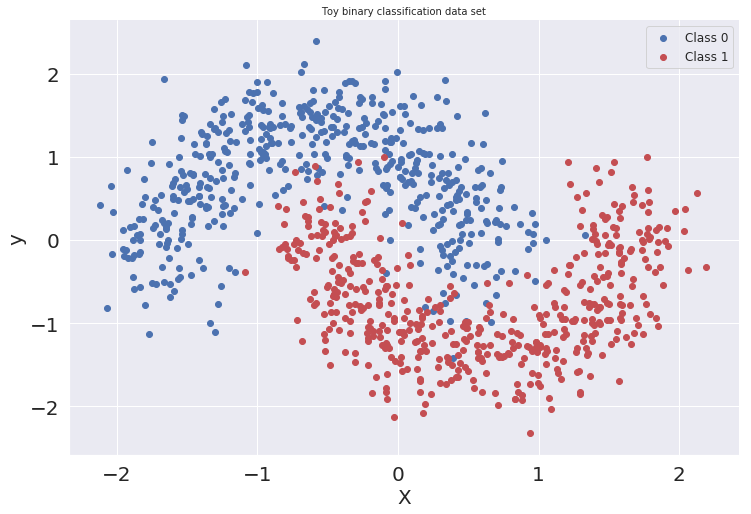

In [3]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
import theano
floatX = theano.config.floatX

X, y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X = X.astype(floatX)
y = y.astype(floatX)

## Plot the data 
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X[y==0, 0], X[y==0, 1], label='Class 0')
ax.scatter(X[y==1, 0], X[y==1, 1], color='r', label='Class 1')
sns.despine(); ax.legend()
ax.set(xlabel='X', ylabel='y', title='Toy binary classification data set');

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:

model=  MLPClassifier()

In [6]:
model.fit(X_train, y_train)

Average Loss = 140.55: 100%|██████████| 200000/200000 [02:16<00:00, 1469.88it/s]
Finished [100%]: Average Loss = 140.52


MLPClassifier(n_hidden=5)

Convegencia

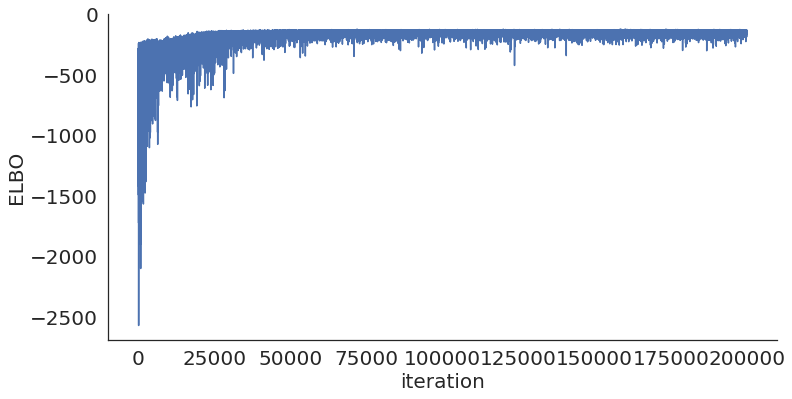

In [7]:
model.plot_elbo()


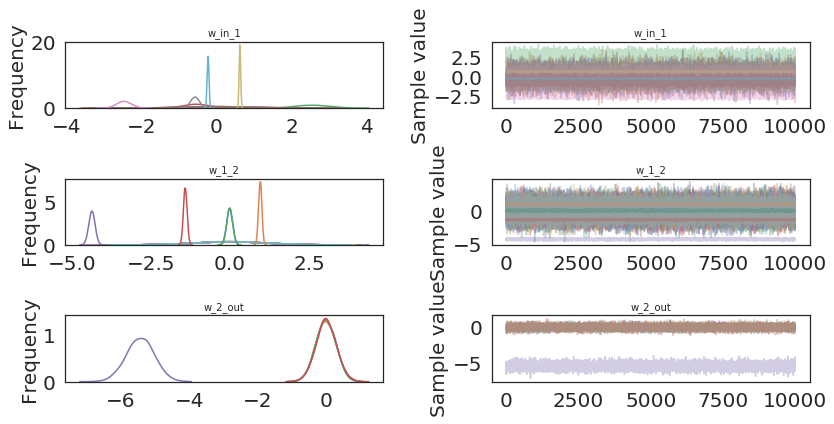

In [8]:
pm.traceplot(model.trace);

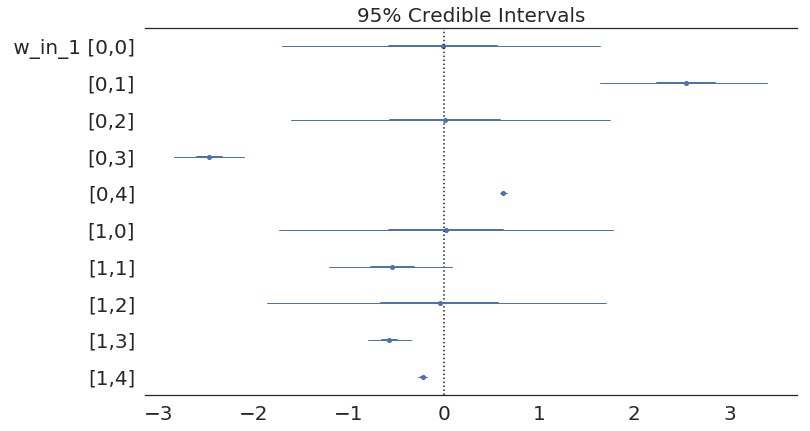

In [9]:
pm.forestplot(model.trace, varnames=["w_in_1"]);


In [10]:
pm.summary(model.trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
w_in_1__0_0,-0.011560,0.850458,0.008558,-1.701244,1.634478
w_in_1__0_1,2.543346,0.446664,0.004325,1.638690,3.397970
w_in_1__0_2,0.012306,0.855502,0.007204,-1.608841,1.740976
w_in_1__0_3,-2.466242,0.187968,0.001748,-2.834675,-2.099340
w_in_1__0_4,0.622984,0.020353,0.000192,0.584281,0.664010
w_in_1__1_0,0.023866,0.903398,0.009197,-1.738161,1.778693
w_in_1__1_1,-0.539644,0.332664,0.003540,-1.207687,0.083956
w_in_1__1_2,-0.036298,0.909734,0.007964,-1.860114,1.704138
w_in_1__1_3,-0.574514,0.115548,0.001170,-0.802395,-0.348031
w_in_1__1_4,-0.226349,0.024442,0.000221,-0.273878,-0.178360


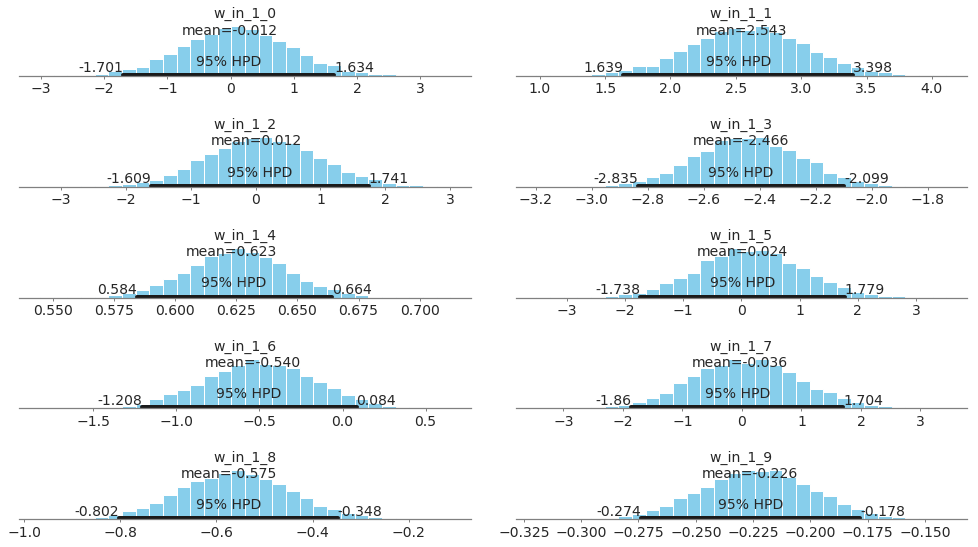

In [12]:
pm.plot_posterior(model.trace, varnames=["w_in_1"], 
                 figsize = [14, 8]);

In [13]:
y_pred = model.predict(X_test)

100%|██████████| 2000/2000 [00:20<00:00, 98.93it/s] 


In [14]:
y_pred

array([False,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,

In [15]:
model.score(X_test,y_test)

100%|██████████| 2000/2000 [00:18<00:00, 105.77it/s]


0.96

In [17]:
model.save('mlpc')

In [19]:
model_new= MLPClassifier()
model_new.load('mlpc')
model_new.score(X_test, y_test)

100%|██████████| 2000/2000 [00:18<00:00, 109.53it/s]


0.96

# MCMC

In [20]:
model2 = MLPClassifier()
model2.fit(X_train, y_train, inference_type='nuts')

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w_2_out, w_1_2, w_in_1]
Sampling 4 chains: 100%|██████████| 10000/10000 [05:12<00:00, 31.95draws/s] 
There were 126 divergences after tuning. Increase `target_accept` or reparameterize.
There were 223 divergences after tuning. Increase `target_accept` or reparameterize.
There were 67 divergences after tuning. Increase `target_accept` or reparameterize.
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


MLPClassifier(n_hidden=5)

In [ ]:
pm.traceplot(model2.trace, varnames=["w_in_1"]);

In [ ]:
pm.gelman_rubin(model2.trace)

In [ ]:
pm.energyplot(model2.trace);

In [ ]:
pm.forestplot(model2.trace, varnames=["w_in_1"]);

In [ ]:
pm.plot_posterior(model2.trace, varnames=["w_in_1"], 
                 figsize = [14, 8]);

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
model2.score(X_test, y_test)